# 1. Import Dependencies and Load Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [27]:
# Read in data

df = pd.read_csv(r'/content/amazonFood.csv')
df.shape

(41710, 6)

In [28]:
df = df.head(10000)
df

,ProductId,UserId,productName,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...
9995,B0007ZKS00,AHG1X8SCKAVAU,"Jablum Jamaica Blue Mountain Coffee, Ground, 8...",5,"I don't even like coffee, but I LOVE this!","I don't even like coffee, but this is in a cla..."
9996,B0007ZKS00,A331TXDQ3NFCHG,"Jablum Jamaica Blue Mountain Coffee, Ground, 8...",3,so so,I'm a big Juan Valdez colombian fan. This Jama...
9997,B0007ZKS00,A22OICJE7B2CE0,"Jablum Jamaica Blue Mountain Coffee, Ground, 8...",2,Jablum leaves me nonplused...,When in Jamaica I drink JBM coffee and have co...
9998,B0007ZKS00,A9Q0F94C8NMVZ,"Jablum Jamaica Blue Mountain Coffee, Ground, 8...",3,Nothing to write home about,"Believe it or not, I bought this at a yard sal..."


In [29]:
# Getting an ID column

df['Id'] = df.index
df = df.reset_index(drop=True)
df.head()

,ProductId,UserId,productName,Score,Summary,Text,Id
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...,4


## Exploratory Data Analysis

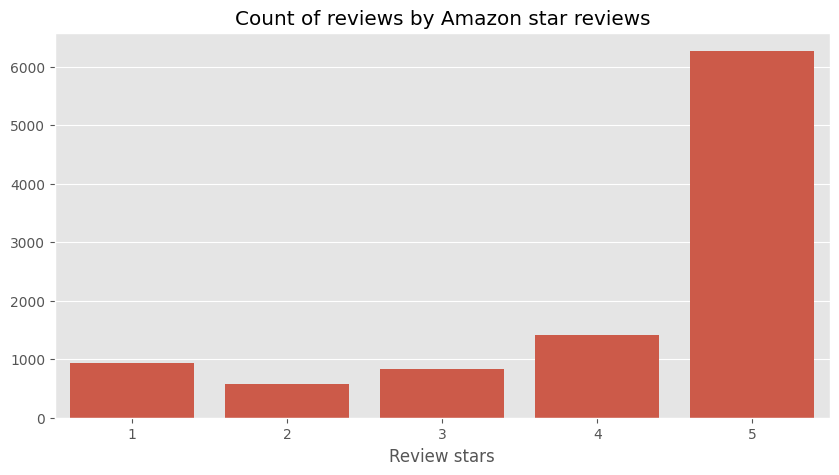

In [30]:
score_counts = df['Score'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.title('Count of reviews by Amazon star reviews')
plt.xlabel('Review stars')
plt.show()

## Basic NLTK

In [31]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [32]:
example = df['Text'][5]
print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


In [33]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [34]:
tagged = nltk.pos_tag(tokens)   # Part Of Speech
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


# 2. VADER Sentiment Scoring

Using NLTK's SentimentIntensityAnalyzer negative, neutral and positive scores of the text were taken.
- This uses 'bag of words' approach:
  1. Stop words are removed
  2. Each word is scored and combined to a total score

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [38]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [40]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [41]:
res

{0: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 1: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 2: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 5: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 6: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 7: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 8: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 9: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 10: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 11: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 12: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 13: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 14: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 1

In [42]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [43]:
# Now we have sentiment data and metadata

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,productName,Score,Summary,Text
0,0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,4,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...


### Plot VADER Results

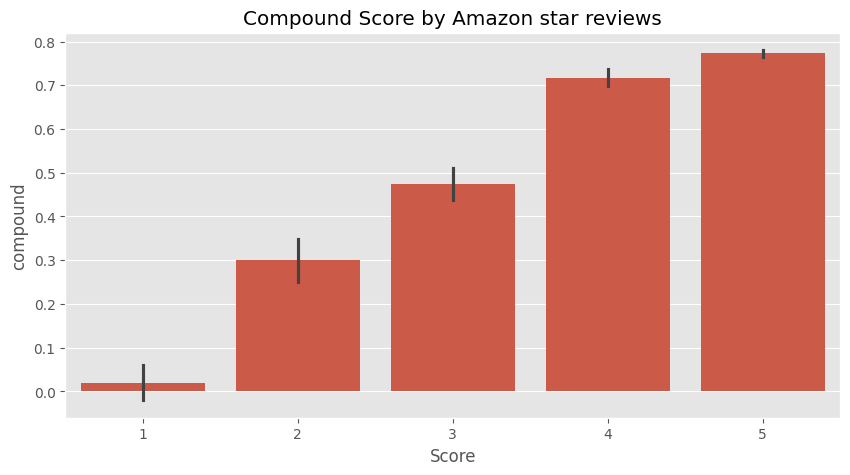

In [44]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon star reviews')
plt.show()

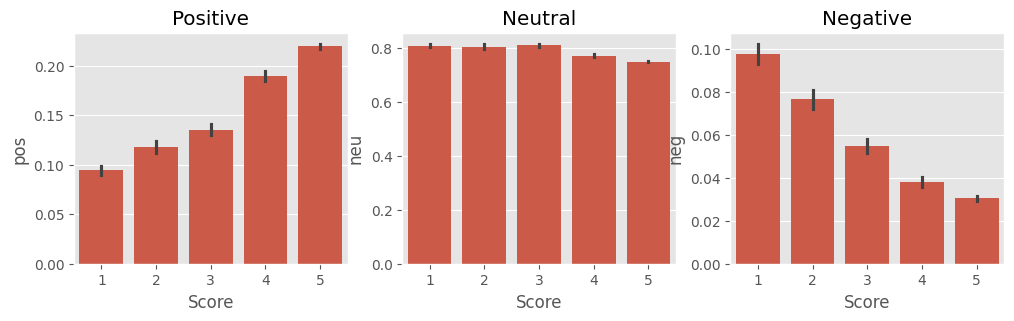

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout
plt.show()

# 3. Roberta Pretrained Model

- Uses a model trained of a large corpus of data
- Transformer model accounts for the words but also the context related to other words

In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [48]:
# VADER results on example

print(example)
sia.polarity_scores(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [49]:
# Run for Roberta Model

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.006129598, 'roberta_neu': 0.021795886, 'roberta_pos': 0.97207445}


In [50]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return(scores_dict)

In [51]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}'] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except Exception as e:
    print(f'Broke for id {myid}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 81
Broke for id 168
Broke for id 495
Broke for id 506
Broke for id 711
Broke for id 827
Broke for id 1029
Broke for id 1115
Broke for id 1275
Broke for id 1327
Broke for id 1433
Broke for id 1510
Broke for id 1762
Broke for id 2039
Broke for id 2055
Broke for id 2147
Broke for id 2171
Broke for id 2455
Broke for id 2456
Broke for id 2460
Broke for id 2486
Broke for id 2500
Broke for id 2502
Broke for id 2505
Broke for id 2506
Broke for id 2576
Broke for id 2577
Broke for id 2579
Broke for id 2851
Broke for id 3301
Broke for id 3479
Broke for id 3616
Broke for id 3619
Broke for id 3816
Broke for id 3825
Broke for id 3915
Broke for id 3983
Broke for id 4012
Broke for id 4053
Broke for id 4083
Broke for id 4521
Broke for id 4647
Broke for id 4657
Broke for id 4826
Broke for id 4860
Broke for id 5062
Broke for id 5316
Broke for id 5321
Broke for id 5417
Broke for id 5535
Broke for id 5851
Broke for id 5944
Broke for id 6091
Broke for id 6131
Broke for id 6143
Broke for id 6179

In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [54]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,productName,Score,Summary,Text
0,0,0.000,0.695,0.305,0.9441,-1.904321,-0.256973,2.677701,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.138,0.862,0.000,-0.5664,0.839022,0.721197,-1.740137,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,0.091,0.754,0.155,0.8265,-2.881923,0.531587,2.746887,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,0.000,1.000,0.000,0.0000,-3.099823,0.571630,2.880065,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,4,0.000,0.552,0.448,0.9468,-2.485039,-0.644133,3.919232,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...


# 4. Compare scores between models

In [55]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'productName', 'Score', 'Summary', 'Text'],
      dtype='object')

## Combine and Compare

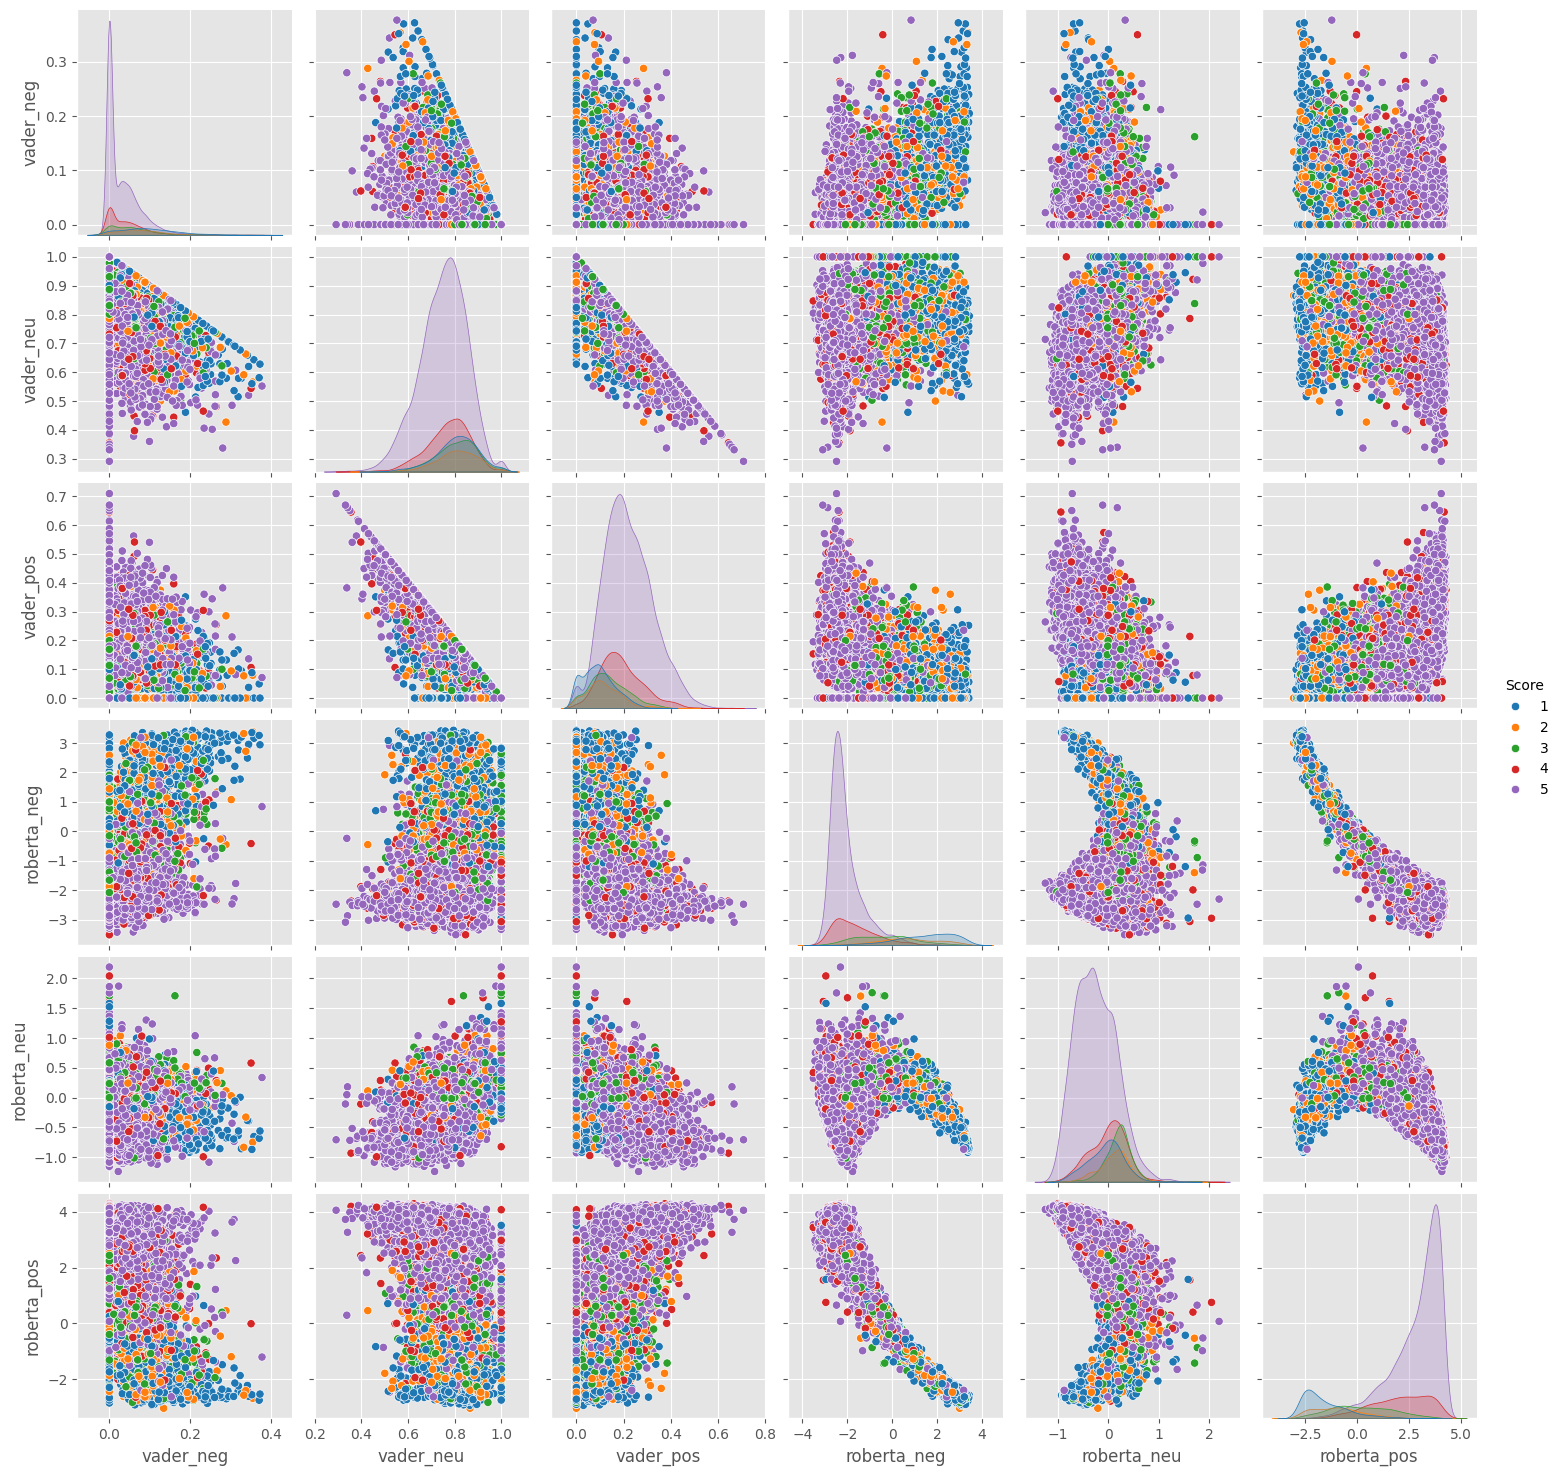

In [56]:
sns.pairplot(data = results_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
                                        'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Score', palette='tab10')
plt.show()

## Review Examples

### Let's look at some Positive 1-Star and Negative 5-Star Reviews

- Positive Sentiment 1-Star reviews

In [64]:
# Roberta results
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [65]:
# VADER results
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

- Negative sentiment 5-Star reviews

In [59]:
# Roberta results
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [60]:
# VADER results
results_df.query('Score == 1').sort_values('vader_neg', ascending=False)['Text'].values[0]

'These are a cheap fake. Nothing like the real Emerald nuts you buy in the store. Its a complete waste of money. DONT get ripped off like I did.'

# 5. Transformers Pipeline

HuggingFace pipelines are a quick and easy way to run sentiment predictions

In [61]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [62]:
sentiment_pipeline('I love ice cream')

[{'label': 'POSITIVE', 'score': 0.9998118281364441}]

In [63]:
sentiment_pipeline('I hate studying')

[{'label': 'NEGATIVE', 'score': 0.9989625215530396}]